# What is PCA 


Principle Component Analysis (PCA) is a fundamental method used to reduce the dimensionality of a problem. This is desirable for many reasons most notably improving computational tracability ?. 

Once in the lower dimensional space machine learning techniques can be used as normal such as clustering, neural networks etc. 

The value of the principle components denotes how important/much information is given by one of the orthogonal directions. 

Therefore, we reduce dimensions by discarding directions with small principle components/importantance.

Often, the direction of the principle com

There any many articles like this on medium in which PCA is explained and motivated though I believe this article offers a different perspective not only geometric intuitively motivating the results but also algebraicly motivaitng the results too. 

the data can be represented by a matrix, $\mathbf{A}$. The covariance matrix of the data is given by $\mathbf{A
^TA}$ (proof at the end of the article). From the Singular Value Decomposition (SVD) of the data it is possible to show that the singular values of the data are the square root of the eigenvalues of the covariance matrix and the right eigenvectors of the data ($V^T$) are the same as the eigenvectors for the covariance matrix. 

# Covariance in PCA

So the principle components of the data are the standard deviations (i.e. the square root of the variance) in the orthogonal directions given by the eigenvectors of the covariance matrix (why this?).  

$$\text{data} = \mathbf{A} = \mathbf{U \Sigma V^T}$$
$$\mathbf{A^T} = \mathbf{V \Sigma^T U^T}$$
$$\text{covar(data)} \propto \mathbf{A^TA} = \mathbf{V \Sigma^T U^T U \Sigma V^T} = \mathbf{V \Sigma^T \Sigma V^T}$$

Here is an example for SVD of a $3 \times 2 $ matrix. We can see that the covariance matrix has eigenvectors $\mathbf{V}$ with eigenvalues $\sigma_i^2$. NEED TO HAVE EXPLANATION HERE AS TO WHY THIS IS USEFUL 

$$ \mathbf{\Sigma^T \Sigma} = \begin{bmatrix} \sigma_1  & 0 & 0 \\ 0 & \sigma_2 & 0 \end{bmatrix} \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \\ 0 & 0 \end{bmatrix} = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_2^2 \end{bmatrix}$$

We can show this for a toy example with just 5 data points and work things out by hand...

$$\text{data} = \mathbf{A}^T \mathbf{A} = \begin{bmatrix} x_1 & x_2 & x_3 \\ y_1 & y_2 & y_3 \end{bmatrix}\begin{bmatrix} x_1 & y_1 \\ x_2 & y_2 \\ x_3 & y_3 \end{bmatrix} = \begin{bmatrix} \sum_i x_i^2 & \sum_i x_iy_i \\ \sum_i y_ix_i & \sum_i y_i^2 \end{bmatrix} $$


# Reducing dimensions 
We can represent the singular value decomposition as a sum: 

$$\text{data} = \sum_i \sigma_i \mathbf{u_i v_i}^T$$

We see that for small values of $\sigma_i$ we can leave it out and still reproduce the data to good accuracy. In PCA we get rid of values of $\sigma_i$ below a certain amount as this makes things quicker. In the example of this 3d plot we see that there is very little variation in one of the three orthogonal directions, meaning it has a small principle component so we can discount it. This leads to a data space in the principal component of only 2d i.e. we have reduced the dimensions from 3 to 2 (hence the term dimensionality reduction). The 2d plot is as if we are looking down the 3 axis. 


# eigenfaces

The eigenface dataset has 400 images that are taken from 40 people and is a great way to visualise PCA in higher dimensions. Each image is grayscale 64 x 64, so can be flattened into a 4096 dimension vector with values ranging from 0 to 1 for each pixel, below is an example. 

As done previous for the 2 and 3 dimensional examples, the principle components and their directions can be found from the SVD of the data matrix (from $\Sigma$ and the columns of $V$ respectively). These directions in 4096 dimensional space can be turned back into images, the examples with the six largest principle values can be seen below. 

We can transform into this new basis by projecting the image vector onto each of the principle component directions. Equally, you can reconstruct the image vector by projecting then image vector in principle component basis onto the pixel space basis vectors (i.e. each pixel is a direction). 

But as discussed earlier, principle components with small values offer little information, so we can discard some. Below is how the face is reproduced with different number of principle components used. For example, if we use just 100 principle components we compress the image ~41 times whilst still having a recognisable face. (not counting the face that we have the store the principle components and their directions).

# reproduction out of the dataset

For the eigenfaces dataset there are only 400 principle components and directions as the rank of the matrix is 400. 

This means there are 400 basis vectors to describe a 4096 dimensional space, so the this basis does not span the total possible space of 64 x 64 images. 

Though we fully span the image space of the dataset as this is how we came up with the new basis (principal component directions). 

For this reason, it is not possible to completely reproduce an image outside of the dataset even when using all principle components. 

Below are two examples of how well out principle components reproduce it. Although neither are perfect, the out of dataset face is reproduced much more faithfully than the image of the car. A nice way to think of this is that the principle component basis spans the sub set of the dataset of faces which is a decent approximation for the sub space of all faces, whereas the sub space of cars is very different. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces

plt.rcParams['text.usetex'] = True
plt.rcParams["figure.autolayout"] = True

In [2]:
# add in LaTeX plotting stuff 

def plot_ellipse(a, b, rot_ang=np.pi/4):

    # can plot the ellipse to (x,y) = (a*cos(t),b*sin(t))
    angles = np.linspace(0, 2*np.pi, 200)

    # why the factor of sqrt 2 here 
    ellipse = [a*np.cos(angles), b*np.sin(angles)]


    rot_mat = np.array([
        [np.cos(rot_ang), np.sin(rot_ang)],
        [-np.sin(rot_ang), np.cos(rot_ang)]
    ])


    ellipse = rot_mat @ ellipse 
    
    plt.plot(ellipse[0], ellipse[1])


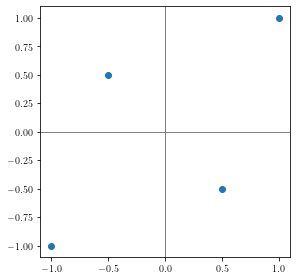

In [70]:
# first plot the points 
data = np.array([
    [1,1],
    [-1,-1],
    [0.5,-0.5],
    [-0.5,0.5],
])

x, y = zip(*data)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [73]:
covar = data.T @ data

covar

array([[2.5, 1.5],
       [1.5, 2.5]])

In [74]:
eigenvals, eigenvecs = np.linalg.eig(covar)

In [75]:
# show covar = data.T @ data and that SVD gives same results

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

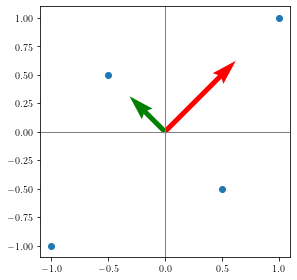

In [78]:
# plot principal components
covar = np.
eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.scatter(x,y)
plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

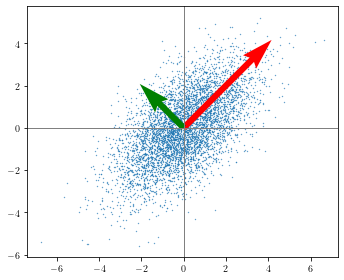

In [10]:
#plot_ellipse(4*np.sqrt(2)/2, 3.5*np.sqrt(2))

# remove this being hard-coded
covar = [
    [2.5,1.5],
    [1.5,2.5]
]


# now plot with may points
mean = np.zeros(2)
data = np.random.multivariate_normal([0,0], covar, size=5000)

x, y = zip(*data)

plt.scatter(x,y, s=0.1)

eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, prin_comp[0], prin_comp[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [11]:
covar = np.cov(data.T) 

covar

array([[2.54613367, 1.51889942],
       [1.51889942, 2.54114995]])

In [12]:
eigenvals, eigenvecs = np.linalg.eig(covar)

In [13]:
eigenvecs

array([[ 0.70768657, -0.70652651],
       [ 0.70652651,  0.70768657]])

In [14]:
eigenvals

array([4.06254327, 1.02474035])

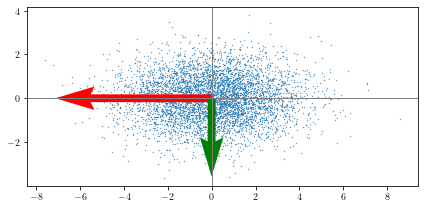

In [15]:
# add in projection into principle component basis
# show example in 3d where third dimension doesn't really add much 
# transform the eigen values but make sure to explain why this is trivial 

U, w, Vt = np.linalg.svd(data)

data = Vt @ data.T 
plt.scatter(data[0], data[1], s=0.1)

# make it so that the vector cannot be negative
#prin_comp = Vt.T @ prin_comp.T
origin = np.array([[0, 0],[0, 0]]) # origin point
plt.quiver(*origin, Vt @ prin_comp.T[0], Vt @ prin_comp.T[1], color=['r','g'], scale=5, width=0.02)

plt.axvline(c='grey', lw=1)
plt.axhline(c='grey', lw=1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [16]:
Vt @ prin_comp.T[0]

array([-1.99999942e+00, -1.52301367e-03])

/var/folders/yr/nz2d8_8n42g11zxgd7yjxhq40000gn/T/ipykernel_48294/2438495147.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)


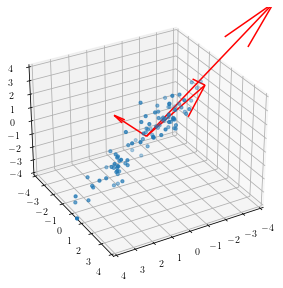

In [17]:
fig = plt.figure()
ax = plt.axes(projection='3d')

covar_3d = [
    [5,4,1],
    [4,5,4],
    [1,4,5]
]

data = np.random.multivariate_normal([0,0,0], covar_3d, size=100)
x, y, z = data.T

ax.scatter3D(x,y,z,s=10, marker='o')

covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)
prin_comp = np.sqrt(eigenvals) * eigenvecs
origin = np.array([[0,0,0],[0,0,0], [0,0,0]]) # origin point
ax.quiver(*origin, prin_comp[0], prin_comp[1], prin_comp[2], length=5, color='r')#, normalize=True)#, width=0.02)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_zlim(-4,4)
ax.view_init(30, 60)
plt.show()

In [18]:
# find the angles of the new coords 


In [19]:
# find eigenstuff of 3d dataset 
covar = np.cov(data.T)
eigenvals, eigenvecs = np.linalg.eig(covar)

eigenvals, eigenvecs

(array([12.0436802,  4.2902559,  0.1621985]),
 array([[-0.61886913, -0.62307622,  0.47830641],
        [-0.66845181,  0.09796673, -0.73727519],
        [-0.41252053,  0.77600164,  0.47712501]]))

In [20]:
# but we can get rid of the third direction as varaition in this direction is very small
_, _, Vt = np.linalg.svd(data)

# how do we best represent the squishing?

In [21]:
np.sqrt(w)

array([11.93798891,  8.46023713])

# Eigenfaces

The olivetti face dataset is made up of 10 different images of 40 people for a total of 400 images. The $64 \times 64$ photos can be flattened into a $4096$ vector. We can then carry out PCA to find the directions in which the 

In [41]:
data = fetch_olivetti_faces()
imgs = data.images
print(imgs.shape)

(400, 64, 64)


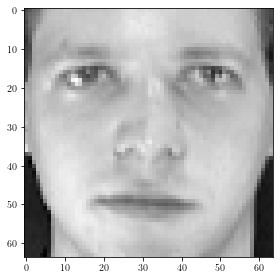

In [44]:
plt.imshow(imgs[0], cmap='gray')
plt.show()

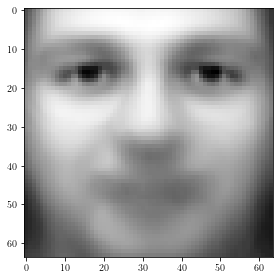

In [43]:
plt.imshow(np.mean(imgs, axis=0), cmap='gray')
plt.show()

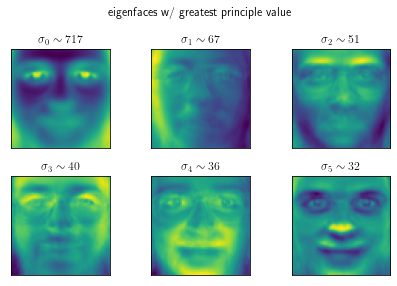

In [69]:
# first 6 eigenfaces
fig, axs = plt.subplots(2, 3)
fig.suptitle('eigenfaces w/ greatest principle value')

for k in range(6):
    
    i = 1 if k >= 3 else 0
    j = k % 3
    
    img = Vt[k].reshape(64,64)
    
    axs[i,j].imshow(img)
    axs[i,j].set_title(f'$\sigma_{k} \sim {round(w[k])}$')
    
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])

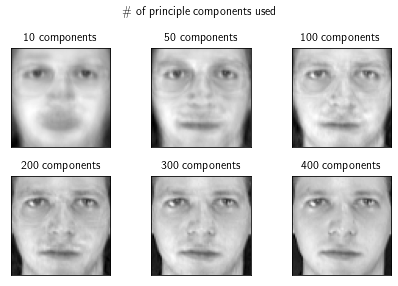

In [55]:
# reconstruction example
fig, axs = plt.subplots(2, 3)
fig.suptitle('\# of principle components used')

reconstruct_img(imgs[0], Vt, 0, 0, '10 components', n_components=10)
reconstruct_img(imgs[0], Vt, 0, 1, '50 components', n_components=50)
reconstruct_img(imgs[0], Vt, 0, 2, '100 components', n_components=100)
reconstruct_img(imgs[0], Vt, 1, 0, '200 components', n_components=200)
reconstruct_img(imgs[0], Vt, 1, 1, '300 components', n_components=300)
reconstruct_img(imgs[0], Vt, 1, 2, '400 components', n_components=400)

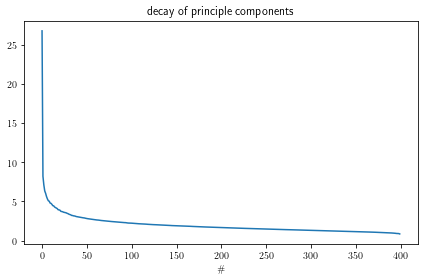

In [39]:
U, w, Vt = np.linalg.svd(imgs)
plt.title('decay of principle components')
plt.plot(np.sqrt(w))
plt.ylabel()
plt.xlabel('\# principle component')
plt.show()

# Reconstructing out of the dataset

In [31]:
face_arr = np.load('face_arr.npy')
car_arr = np.load('car_arr.npy')

In [45]:
def reconstruct_img(img, Vt, i, j, title, n_components=400):
    
    img = img.flatten()
    coef = Vt @ img
    linear_comb = coef[:n_components] * Vt.T[:,:n_components]
    reconstructed_arr = np.mean(linear_comb, axis=-1).reshape(64,64)
    
    axs[i,j].imshow(reconstructed_arr, cmap='gray')
    axs[i,j].set_title(title)
    
    axs[i,j].set_xticks([])
    axs[i,j].set_yticks([])

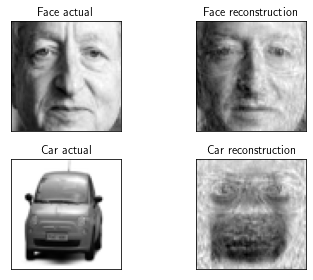

In [35]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(face_arr, cmap='gray')
axs[0, 0].set_title('Face actual')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[1, 0].imshow(car_arr, cmap='gray')
axs[1, 0].set_title('Car actual')    
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

reconstruct_img(face_arr, Vt, 0, 1, 'Face reconstruction')
reconstruct_img(car_arr, Vt, 1, 1, 'Car reconstruction')

In [29]:
coef = Vt @ imgs[0]

coef

array([-4.1219818e+01, -7.6485866e-01, -2.1319959e+00, ...,
        2.3096800e-07, -7.4505806e-09,  2.0861626e-07], dtype=float32)

In [ ]:
# now take the first 20 components
for i in range(1,4):
    plt.imshow(np.mean(linear_comb[:,:i*100], axis=-1).reshape(64,64), cmap='gray')
    plt.show()

In [ ]:
plt.imshow(np.mean(linear_comb, axis=-1).reshape(64,64))
plt.show()

In [ ]:
linear_comb = coef[:400] * Vt.T[:,:400]

linear_comb.shape

In [30]:
reconstruct_img(imgs[0], Vt, n_components=40)

NameError: name 'reconstruct_img' is not defined

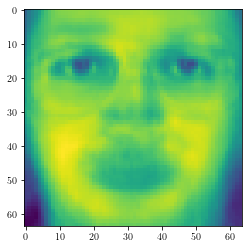

In [277]:
plt.imshow(np.mean(linear_comb[:,:10], axis=-1).reshape(64,64))

In [276]:
np.where(coef == 3.91819)

(array([4]),)

In [ ]:
# try to construct photo from out of the data set to explain what is going on with the degenerate subspace
# from PIL import Image, ImageOps
img = Image.open('geoff-hinton.jpeg')

box = (38,70,155,170)

img = img.crop(box)

img = img.resize((64,64))

img.convert('L')

img = ImageOps.grayscale(img)

hinton_arr = np.asarray(img)

np.save('hinton_arr.npy', hinton_arr)

plt.imshow(hinton_arr, cmap='gray')
plt.show()

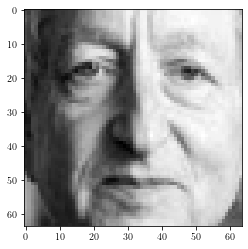

In [318]:
# try to construct photo from out of the data set to explain what is going on with the degenerate subspace
# from PIL import Image, ImageOps

for i in range():
    
    for j in range():

        img = Image.open('geoff-hinton.jpeg')

        box = (38,70,155,170)

        img = img.crop(box)

        img = img.resize((64,64))

        img.convert('L')

        img = ImageOps.grayscale(img)

        hinton_arr = np.asarray(img)

        reconstruct_hinton_arr = reconstruct_img(hinton_arr, Vt)
        
        dist = np.linalg.norm(reconstruct_hinton_arr - hinton_arr)

        if dist < min_dist:
            
            coords = (i,j)
            min_dist = dist

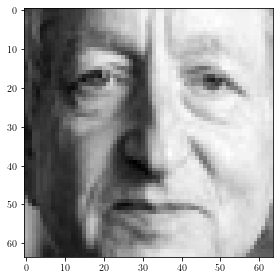

In [408]:
# now I've save the array things are a bit more simple...
face_arr = np.load('face_arr.npy')
plt.imshow(hinton_arr, cmap='gray')
plt.show()

In [329]:
# do a grid search to find the best position for the face 

np.linalg.norm(reconstruct_hinton_arr - hinton_arr)

10067.2

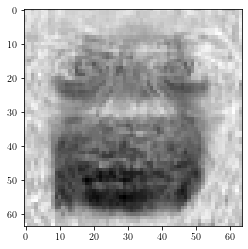

In [362]:
reconstruct_car_arr, car_plot = reconstruct_img(car_arr, Vt)